In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Supervised Learning: Yelp Reviews
* In this project, I'm trying to build machine learning models based on yelp's data: http://www.yelp.com/dataset_challenge to study features of the business and make prdedictions that could help the business.
* This dataset includes:
  * 1.6M reviews and 500K tips by 366K users for 61K businesses
  * 481K business attributes, e.g., hours, parking availability, ambience.
  * Social network of 366K users for a total of 2.9M social edges.
  * Aggregated check-ins over time for each of the 61K businesses
* 5 files: 
  1. **Business**: dataset about business attributes, e.g., hours, parking availability, ambience
  2. **Review**: text reviews of the businesses
  3. **User**: information about users who made the reviews
  4. **Check-in**: checkin records of business
  5. **Tip**: short text giving tips about businesses

## Data Cleaning and Transformation
This dataset comes in as .json format. I used `json-to-csv-convert.py` from https://github.com/Yelp/dataset-examples to convert all the data to .csv files and so it's eaiser to load into dataframes.

## Explore Business Features

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
biz = pd.read_csv('./data/yelp_data/yelp_academic_dataset_business.csv',low_memory=False)
reviews = pd.read_csv('./data/yelp_data/yelp_academic_dataset_review.csv')
users = pd.read_csv('./data/yelp_data/yelp_academic_dataset_user.csv')
checkin = pd.read_csv('./data/yelp_data/yelp_academic_dataset_checkin.csv')
tip = pd.read_csv('./data/yelp_data/yelp_academic_dataset_tip.csv')
biz.head()

attributes.Ambience.divey attributes.Dietary Restrictions.vegan  \
0                       NaN                                   NaN   
1                       NaN                                   NaN   
2                       NaN                                   NaN   
3                       NaN                                   NaN   
4                     False                                   NaN   

  attributes.Happy Hour hours.Thursday.open attributes.Order at Counter  \
0                   NaN               08:00                         NaN   
1                  True                 NaN                         NaN   
2                   NaN                 NaN                         NaN   
3                   NaN               10:00                         NaN   
4                 False               10:00                         NaN   

  attributes.Hair Types Specialized In.africanamerican  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

  attributes.Hair Types Specialized In.kids attributes.BYOB hours.Friday.open  \
0                                       NaN             NaN             08:00   
1                                       NaN             NaN               NaN   
2                                       NaN             NaN               NaN   
3                                       NaN             NaN             10:00   
4                                       NaN             NaN             10:00   

                                          categories  \
0                    ['Doctors', 'Health & Medical']   
1                                      ['Nightlife']   
2               ['Active Life', 'Mini Golf', 'Golf']   
3  ['Shopping', 'Home Services', 'Internet Servic...   
4  ['Bars', 'American (New)', 'Nightlife', 'Loung...   

              ...              attributes.Smoking attributes.Attire  \
0             ...                             NaN               NaN   
1             ...                             NaN               NaN   
2             ...                             NaN               NaN   
3             ...                             NaN               NaN   
4             ...                              no            casual   

  attributes.Hair Types Specialized In.curly attributes.Good For Groups  \
0                                        NaN                        NaN   
1                                        NaN                       True   
2                                        NaN                        NaN   
3                                        NaN                        NaN   
4                                        NaN                       True   

  neighborhoods attributes.Open 24 Hours attributes.Ambience.romantic  \
0            []                      NaN                          NaN   
1            []                      NaN                          NaN   
2            []                      NaN                          NaN   
3            []                      NaN                          NaN   
4            []                      NaN                        False   

  attributes.Hair Types Specialized In.perms attributes.Music.jukebox  \
0                                        NaN                      NaN   
1                                        NaN                      NaN   
2                                        NaN                      NaN   
3                                        NaN                      NaN   
4                                        NaN                      NaN   

  attributes.Ambience.upscale  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                       False  

[5 rows x 105 

In [3]:
reviews.head()

user_id               review_id  \
0  Xqd0DzHaiyRqVH3WRG7hzg  15SdjuK7DmYqUAj6rjGowg   
1  H1kH6QZV7Le4zqTRNxoZow  RF6UnRTtG7tWMcrO2GEoAg   
2  zvJCcrpm2yOZrxKffwGQLA  -TsVN230RCkLYKBeLsuz7A   
3  KBLW4wJA_fwoWmMhiHRVOA  dNocEAyUucjT371NNND41Q   
4  zvJCcrpm2yOZrxKffwGQLA  ebcN2aqmNUuYNoyvQErgnA   

                                                text  votes.cool  \
0  dr. goldberg offers everything i look for in a...           1   
1  Unfortunately, the frustration of being Dr. Go...           0   
2  Dr. Goldberg has been my doctor for years and ...           1   
3  Been going to Dr. Goldberg for over 10 years. ...           0   
4  Got a letter in the mail last week that said D...           1   

              business_id  votes.funny  stars        date    type  \
0  vcNAWiLM4dR7D2nwwJ7nCA            0      5  2007-05-17  review   
1  vcNAWiLM4dR7D2nwwJ7nCA            0      2  2010-03-22  review   
2  vcNAWiLM4dR7D2nwwJ7nCA            0      4  2012-02-14  review   
3  vcNAWiLM4dR7D2nwwJ7nCA            0      4  2012-03-02  review   
4  vcNAWiLM4dR7D2nwwJ7nCA            0      4  2012-05-15  review   

   votes.useful  
0             2  
1             2  
2             1  
3             0  
4             2

### Select restaurants from the business dataset

In [4]:
biz['ifRestaurants'] = biz.categories.apply(lambda x: 1 if 'Restaurants' in x else 0)
restaurants = biz[biz.ifRestaurants == 1]
restaurants.shape

(21892, 106)

###Show distribution of ratings

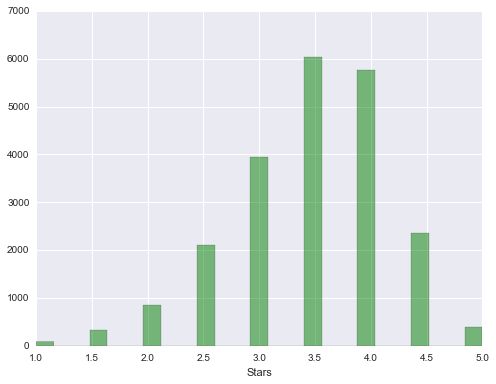

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
ax = restaurants['stars'].hist(color='g', alpha=0.5, bins=25)
ax.set_xlabel("Stars")

In [6]:
users.head()

yelping_since  compliments.plain  review_count  \
0       2004-10                 25           108   
1       2004-10                921          1233   
2       2004-10                 86           442   
3       2004-10                NaN            11   
4       2004-10                  2            66   

                                             friends  compliments.cute  \
0  ['rpOyqD_893cqmDAtJLbdog', '4U9kSBLuBDU391x6bx...                15   
1  ['18kPq7GPye-YQ3LyKyAZPw', '4U9kSBLuBDU391x6bx...               209   
2  ['18kPq7GPye-YQ3LyKyAZPw', 'rpOyqD_893cqmDAtJL...                23   
3  ['18kPq7GPye-YQ3LyKyAZPw', 'rpOyqD_893cqmDAtJL...                 2   
4  ['rpOyqD_893cqmDAtJLbdog', 'HDQixQ-WZEV0LVPJlI...                 2   

   compliments.writer  fans  compliments.note  type  compliments.hot  \
0                   9    69                20  user               48   
1                 290  1012               589  user             1032   
2                  24    93                82  user              102   
3                 NaN     2               NaN  user              NaN   
4                   2     3                 1  user                1   

       ...       compliments.more  \
0      ...                      3   
1      ...                    129   
2      ...                     19   
3      ...                    NaN   
4      ...                      1   

                                               elite       name  \
0                                       [2005, 2006]     Russel   
1  [2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...     Jeremy   
2  [2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...    Michael   
3                                                 []        Ken   
4                                             [2005]  Katherine   

                  user_id votes.cool compliments.list votes.funny  \
0  18kPq7GPye-YQ3LyKyAZPw        245              NaN         166   
1  rpOyqD_893cqmDAtJLbdog       9837               37        6849   
2  4U9kSBLuBDU391x6bxU-YA        727                4         907   
3  fHtTaujcyKvXglE33Z5yIw          5              NaN           1   
4  SIBCL7HBkrP4llolm4SC2A         11              NaN          10   

   compliments.photos  compliments.funny  votes.useful  
0                  15                 11           278  
1                 287                561         12642  
2                  23                122          1445  
3                 NaN                NaN            11  
4                 NaN                NaN            34  

[5 rows x 23 columns]

In [7]:
checkin.head()

checkin_info.9-0  checkin_info.9-1  checkin_info.9-2  checkin_info.9-3  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN                 1               NaN               NaN   
3                 1               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   checkin_info.9-4  checkin_info.9-5  checkin_info.9-6  checkin_info.20-2  \
0               NaN                 1               NaN                NaN   
1               NaN                 1               NaN                NaN   
2                 3               NaN               NaN                NaN   
3               NaN               NaN               NaN                NaN   
4                 1               NaN               NaN                NaN   

   checkin_info.20-3  checkin_info.20-0        ...          checkin_info.6-1  \
0                NaN                NaN        ...                       NaN   
1                NaN                NaN        ...                       NaN   
2                NaN                NaN        ...                       NaN   
3                NaN                NaN        ...                       NaN   
4                NaN                NaN        ...                       NaN   

   checkin_info.6-0  checkin_info.3-1  checkin_info.18-6 checkin_info.18-5  \
0               NaN               NaN                NaN               NaN   
1               NaN               NaN                NaN               NaN   
2               NaN               NaN                NaN               NaN   
3               NaN               NaN                NaN               NaN   
4               NaN               NaN                NaN               NaN   

   checkin_info.18-4  checkin_info.18-3  checkin_info.18-2  checkin_info.18-1  \
0                  1                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                  1                  1                NaN                NaN   
3                NaN                NaN                NaN                  1   
4                NaN                NaN                  1                  1   

   checkin_info.18-0  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 170 columns]

In [8]:
tip.head()

user_id                                               text  \
0  -6rEfobYjMxpUWLNxszaxQ                             Don't waste your time.   
1  EZ0r9dKKtEGVx2CdnowPCw  Your GPS will not allow you to find this place...   
2  xb6zEQCw9I-Gl0g06e1KsQ                              Great drink specials!   
3  fvTivrsJoUMYXnOJw9wZfw  Sarah rocks! Best waitress here! Be sure to ge...   
4  6GrH6gp09pqYykGv86D6Dg  Decent selection of more than just bar food. \...   

              business_id  likes        date type  
0  cE27W9VPgO88Qxe4ol6y_g      0  2013-04-18  tip  
1  mVHrayjG3uZ_RLHkLj-AMg      0  2013-01-06  tip  
2  KayYbHCt-RkbGcPdGOThNg      0  2013-12-03  tip  
3  wJr6kSA5dchdgOdwH6dZ2w      0  2013-07-22  tip  
4  fNGIbpazjTRdXgwRY_NIXA      0  2013-04-22  tip

In [9]:
print biz.shape
print biz.dtypes

(61184, 106)
attributes.Ambience.divey                                object
attributes.Dietary Restrictions.vegan                    object
attributes.Happy Hour                                    object
hours.Thursday.open                                      object
attributes.Order at Counter                              object
attributes.Hair Types Specialized In.africanamerican     object
attributes.Hair Types Specialized In.kids                object
attributes.BYOB                                          object
hours.Friday.open                                        object
categories                                               object
latitude                                                float64
attributes.Outdoor Seating                               object
attributes.Alcohol                                       object
attributes.Ambience.classy                               object
attributes.Payment Types.mastercard                      object
...
attributes.Drive-Thru  

In [10]:
biz.describe()

latitude  review_count       open         stars  \
count  61184.000000  61184.000000      61184  61184.000000   
mean      37.326077     28.272506   0.878089      3.673305   
std        5.741085     88.652050  0.3271856      0.891207   
min       32.871923      3.000000      False      1.000000   
25%       33.509601      4.000000          1      3.000000   
50%       35.994636      8.000000          1      3.500000   
75%       36.240430     21.000000          1      4.500000   
max       56.036545   4578.000000       True      5.000000   

       attributes.Price Range     longitude  ifRestaurants  
count            41694.000000  61184.000000   61184.000000  
mean                 1.800283    -97.491803       0.357806  
std                  0.717469     29.624473       0.479359  
min                  1.000000   -115.386550       0.000000  
25%                  1.000000   -115.052224       0.000000  
50%                  2.000000   -111.932944       0.000000  
75%                  2.000000    -80.863329       1.000000  
max                  4.000000      8.549249       1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b59aa50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1137e7810>]], dtype=object)

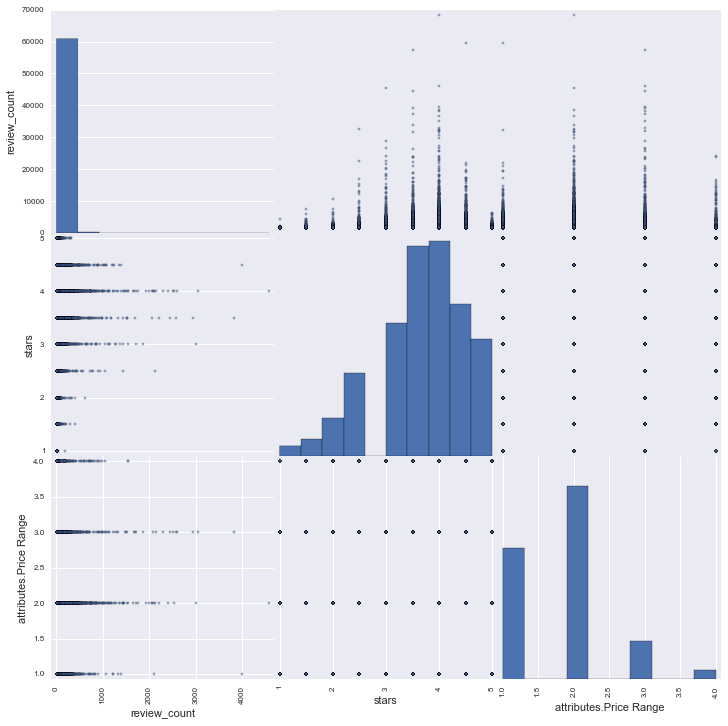

In [11]:
cols = ['review_count', 'stars', 'attributes.Price Range']
pd.scatter_matrix(biz[cols], figsize=(12, 12))

* In the business dataset, each of the feature attributes such as 'Wi-fi', 'Good for kids' were represented as binary. And there was a lot of missing values.
* Stars, price range look like continous variable but the actually discrete beacuse stars were rounded to half point and price range can only take values from 1-4
* Most of the businesses have stars above 3.5 in this dataset

## Predicting business features based on text reviews
* When poeple post reviews on yelp, text reviews are required but reviews of the features of the buiness such as 'Good for Kids', 'Good for Group' , ' Have Wifi' etc. are voluntary. So it will be helpful if we can predict some of the features based on the text reviews.
* To simplify the study, I only predict one feature: 'Is Good for Kids'. But the methdology used could be replicated to study other features as well.

### Merge reviews and business on business_id

In [12]:
biz_review = pd.merge(reviews,restaurants,on='business_id')

In [13]:
biz_review.shape

(990627, 115)

In [14]:
## This helper function takes in a string and return a string with stopwords removed
def remove_stop_words(text):
    from nltk.corpus import stopwords
    stop = set(stopwords.words('english'))
    return ' '.join([w for w in text.split() if not w in stop])

In [15]:
df = biz_review[['attributes.Good For Kids','text','votes.useful']]
df = df.dropna()
df.shape

(271487, 3)

In [22]:
df.head()

attributes.Good For Kids  \
34                     True   
35                     True   
36                     True   
37                     True   
38                     True   

                                                 text  votes.useful  \
34  If you want a true understanding of Pittsburgh...             2   
35  Good Luck getting a seat, that's all I have to...             0   
36  Stick to basics and this is the best place in ...             0   
37  The biggest breakfast in Pittsburgh, as far as...             0   
38  Cheap, unpretentious, and, for this, one of my...             0   

                                              text_sw  
34  If want true understanding Pittsburgh morning,...  
35  Good Luck getting seat, that's I say. The Gab ...  
36  Stick basics best place around 'burgh. First t...  
37  The biggest breakfast Pittsburgh, far I tell -...  
38  Cheap, unpretentious, and, this, one favorite ...

In [16]:
df['text_sw'] = df.text.apply(remove_stop_words)

In [111]:
# Generate the feature vector and target variable
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = CountVectorizer(ngram_range = (1,2))
vectorizer = TfidfVectorizer(min_df=2)
x = vectorizer.fit_transform(df.text_sw)
y = df['attributes.Good For Kids'].values.astype(int)

In [ ]:
# #Convert the sparse matrix back to a normal array to run feature selection
# x_back = x.toarray()
# x_df = pd.DataFrame(x_back, columns=vectorizer.get_feature_names())
# x_columns = list(x_df.columns)

# #Feature selection
# from sklearn import feature_selection as f_select
# significant_features = []
# pvals = []
# for feature in x_columns:
#     pval = f_select.f_classif(x_df[feature],y)
#     if pval[1][0] < 0.05:
#         significant_features.append(feature)
#         pvals.append(pval[1][0])

### Create OOS data

In [112]:
## Create test data
from sklearn import cross_validation
xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=1234)

In [113]:
from sklearn import naive_bayes, linear_model
# new_features = x_df[significant_features]

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(naive_bayes.MultinomialNB(),xtrain,ytrain,scoring='roc_auc',cv=5)

In [114]:
scores.mean()

0.86926024115505096

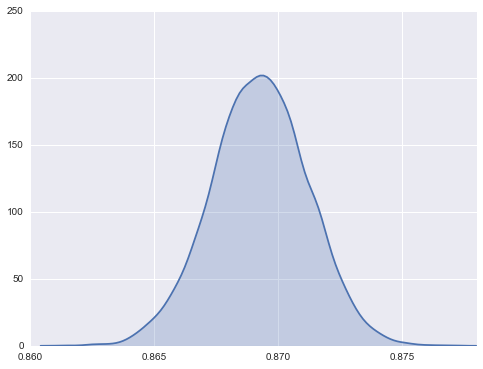

In [115]:
plt.figure(figsize=(8, 6))
sns.kdeplot(np.random.normal(loc=np.array(scores).mean(), scale=np.array(scores).std(), size=10000), shade=True)

fpr 0.445348221591
tpr 0.939381283375
precision 0.772887928919
accuracy 0.792165457291


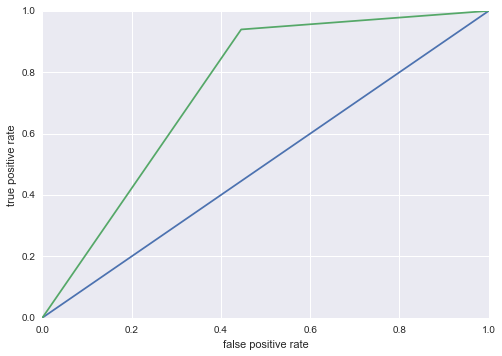

In [116]:
from sklearn import metrics
clf = naive_bayes.MultinomialNB().fit(xtrain, ytrain)
print 'fpr', metrics.roc_curve(ytest, clf.predict(xtest))[0][1] #fpr
print 'tpr', metrics.roc_curve(ytest, clf.predict(xtest))[1][1] #tpr
print 'precision', metrics.precision_score(ytest, clf.predict(xtest))
print 'accuracy', metrics.accuracy_score(ytest, clf.predict(xtest))

roc = metrics.roc_curve(ytest, clf.predict(xtest))
plt.figure()
plt.plot([0, 0.5, 1], [0, 0.5, 1])
plt.plot(roc[0], roc[1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

We had 0.86 auc score from the cross validated test, which I think is pretty good.

## Can I improve the prediction by taking the useful votes of the review into account?
* Each review has several vote columns such as, votes.funny, votes.useful and votes.cool, which are vote counts for those categories. So it might be helpful to take the useful votes into consideration.

In [117]:
review_votes = df[df['votes.useful']>0]
# features = list(review_votes.columns)
# features.remove('attributes.Good For Kids')
x = vectorizer.fit_transform(review_votes.text_sw)
y = review_votes['attributes.Good For Kids'].values.astype(int)
xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=1234)

In [118]:
new_score = cross_val_score(naive_bayes.MultinomialNB(),x,y,scoring='roc_auc',cv=5)
print new_score.mean()

0.799747981138


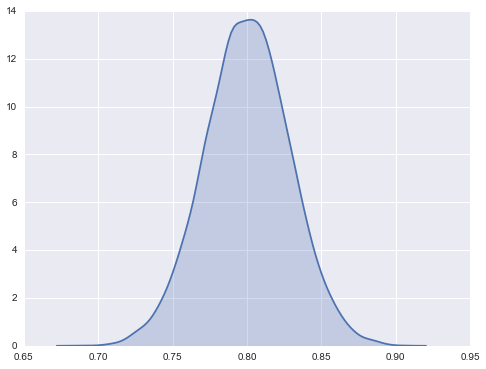

In [119]:
plt.figure(figsize=(8, 6))
sns.kdeplot(np.random.normal(loc=np.array(new_score).mean(), scale=np.array(new_score).std(), size=10000), shade=True)

fpr 0.440652500537
tpr 0.947541207852
precision 0.771380846325
accuracy 0.796440954092


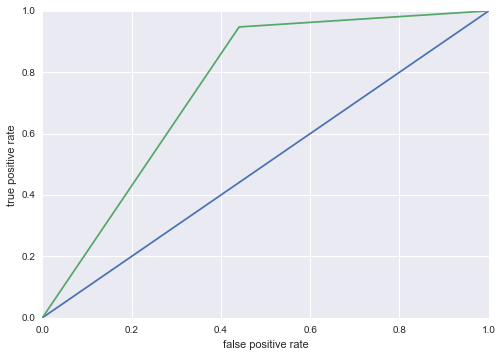

In [120]:
clf = naive_bayes.MultinomialNB().fit(xtrain, ytrain)
print 'fpr', metrics.roc_curve(ytest, clf.predict(xtest))[0][1] #fpr
print 'tpr', metrics.roc_curve(ytest, clf.predict(xtest))[1][1] #tpr
print 'precision', metrics.precision_score(ytest, clf.predict(xtest))
print 'accuracy', metrics.accuracy_score(ytest, clf.predict(xtest))

roc = metrics.roc_curve(ytest, clf.predict(xtest))
plt.figure()
plt.plot([0, 0.5, 1], [0, 0.5, 1])
plt.plot(roc[0], roc[1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

##Predict Stars of the review
* Predicting multiclass is hard so I instead I'm trying to predict if a review is a 5-star review

In [126]:
stars = biz_review[['stars_x','text','votes.useful']]
stars = stars.dropna()
stars['if_five']=stars.stars_x.apply(lambda x: 1 if x==5 else 0)
stars.shape

(990626, 4)

In [39]:
stars.head()

stars_x                                               text  votes.useful  \
0        5  This place was DELICIOUS!!  My parents saw a r...             5   
1        5  Can't miss stop for the best Fish Sandwich in ...             0   
2        5  This place should have a lot more reviews - bu...             2   
3        4  This place was very good. I found out about Em...             1   
4        5  Old school.....traditional "mom 'n pop" qualit...             0   

   if_five  
0        1  
1        1  
2        1  
3        0  
4        1

In [127]:
stars.if_five.mean()

0.33582603323555005

In [128]:
stars['text_sw'] = stars.text.apply(remove_stop_words)

In [122]:
x = vectorizer.fit_transform(stars.text_sw)
y = stars.if_five
xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=1234)
new_score = cross_val_score(naive_bayes.MultinomialNB(),xtrain,ytrain,scoring='roc_auc',cv=5)
print new_score.mean()

0.848315771682


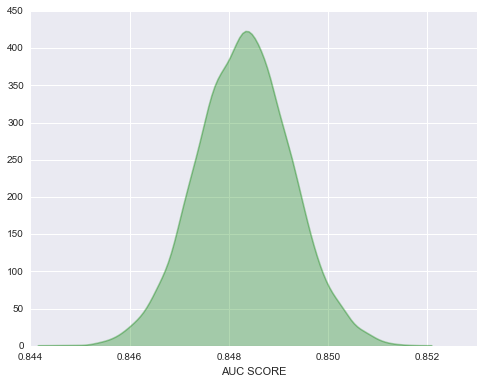

In [123]:
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(np.random.normal(loc=np.array(new_score).mean(), scale=np.array(new_score).std(), size=10000), 
                 shade=True,color='g',alpha=0.3)
ax.set_xlabel("AUC SCORE")

fpr 0.0591644603585
tpr 0.387696623283
tnr 0.0
tnr 0.0
precision 0.767235718976
accuracy 0.755716059477


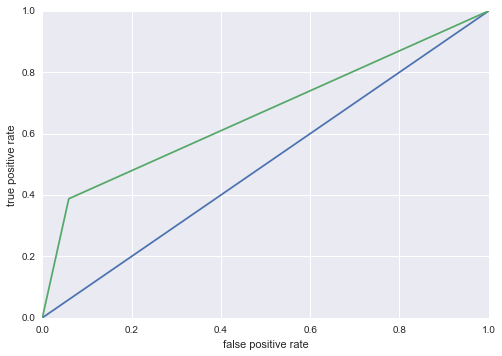

In [130]:
clf = naive_bayes.MultinomialNB().fit(xtrain, ytrain)
print 'fpr', metrics.roc_curve(ytest, clf.predict(xtest))[0][1] #fpr
print 'tpr', metrics.roc_curve(ytest, clf.predict(xtest))[1][1] #tpr
print 'precision', metrics.precision_score(ytest, clf.predict(xtest))
print 'accuracy', metrics.accuracy_score(ytest, clf.predict(xtest))

roc = metrics.roc_curve(ytest, clf.predict(xtest))
plt.figure()
plt.plot([0, 0.5, 1], [0, 0.5, 1])
plt.plot(roc[0], roc[1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

## Conclusions and Next Steps
1. Training on useful reviews helped very little than using all reviews
2. Finding five-star reviews is harder than finding the reviwes that are not five-star
3. Dig into what makes a review five-star and what insights we can draw for business